In [85]:
import numpy as np
import math
import pandas as pd

import thinkstats2
import thinkplot
import brfss
import nsfg
import first

In [2]:
df = brfss.ReadBrfss(nrows=None)
sample = thinkstats2.SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2

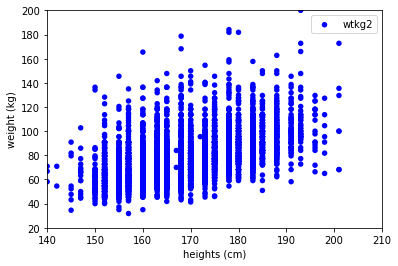

<Figure size 576x432 with 0 Axes>

In [3]:
thinkplot.Scatter(heights, weights, alpha=1.0)
thinkplot.Show(xlabel='heights (cm)', ylabel='weight (kg)', axis=[140, 210, 20, 200])

In [4]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values

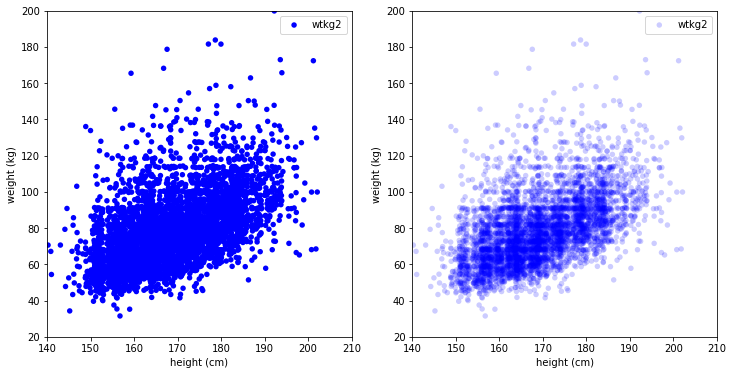

In [5]:
heights = Jitter(heights, 1.3)
weights = Jitter(weights, 0.5)

thinkplot.PrePlot(2, cols=2)
thinkplot.Scatter(heights, weights, alpha=1.0)
thinkplot.Config(label='Jittered values', xlabel='height (cm)', ylabel='weight (kg)', axis=[140, 210, 20, 200])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Scatter(heights, weights, alpha=0.2)
thinkplot.Config(label='Jittered values', xlabel='height (cm)', ylabel='weight (kg)', axis=[140, 210, 20, 200])

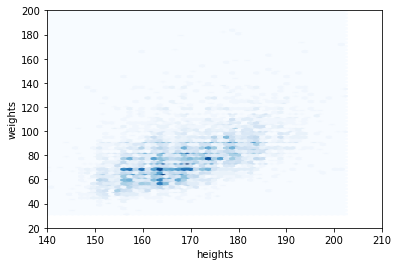

In [6]:
thinkplot.HexBin(heights, weights)
thinkplot.Config(xlabel='heights', ylabel='weights', axis=[140, 210, 20, 200], legend=False)

In [7]:
fh, fw = df.htm3, df.wtkg2
fh, fw = thinkstats2.Jitter(fh, 1.3), thinkstats2.Jitter(fw, 0.5)

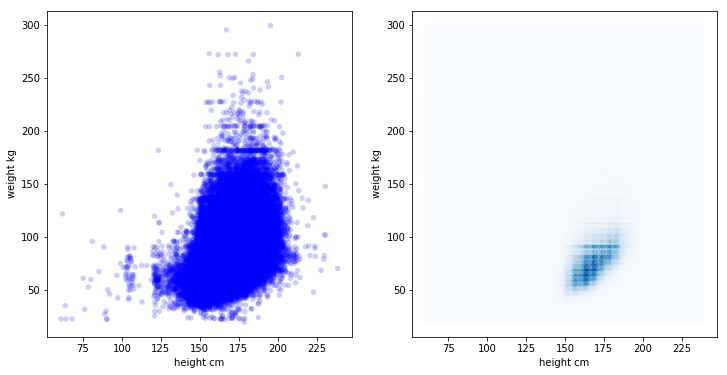

In [8]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Scatter(fh, fw, alpha=0.2)
thinkplot.Config(xlabel='height cm', ylabel='weight kg')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.HexBin(fh, fw)
thinkplot.Config(xlabel='height cm', ylabel='weight kg')

In [10]:
df = df.dropna(subset=['htm3', 'wtkg2'])
bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

In [15]:
for i, group in groups:
    print(i, len(group))

0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131


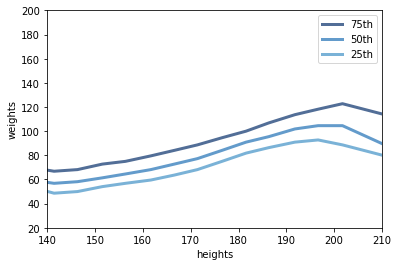

In [114]:
mean_heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

for percent in [75, 50, 25]:
    mean_weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_heights, mean_weights, label=label)
thinkplot.Config(xlabel='heights', ylabel='weights', axis=[140, 210, 20, 200], legend=True)

In [24]:
def cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    if meanx == None:
        meanx = xs.mean()
    if meany == None:
        meany = ys.mean()
        
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [25]:
heights, weights = df.htm3, df.wtkg2
cov(heights, weights)

103.3329085769776

In [38]:
def corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)
    
    corr = cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr
    

In [39]:
corr(heights, weights)

0.5087364789734607

In [40]:
np.corrcoef(heights, weights)

array([[1.        , 0.50873648],
       [0.50873648, 1.        ]])

In [54]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs)
    yranks = pd.Series(ys)
    return corr(xranks, yranks)

In [55]:
SpearmanCorr(heights, weights)

0.5087364789734607

In [56]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs)
    yranks = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [57]:
SpearmanCorr(heights, weights)

0.5405846262320491

In [58]:
corr(heights, np.log(weights))

0.5317282605983452

# Exercises

In [64]:
preg = nsfg.ReadFemPreg()
resp = nsfg.ReadFemResp()

In [87]:
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [91]:
age, wgt = live.agepreg, live.totalwgt_lb

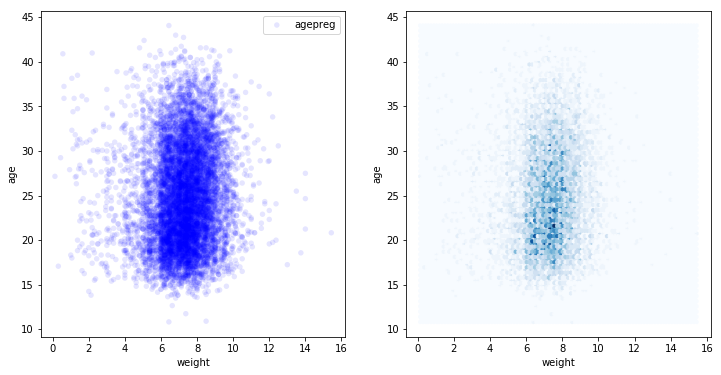

In [116]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Scatter(wgt, age, alpha=0.1)
thinkplot.Config(xlabel='weight', ylabel='age')
try:
    thinkplot.PrePlot(2)
    thinkplot.SubPlot(2)
    thinkplot.HexBin(wgt, age)
    thinkplot.Config(xlabel='weight', ylabel='age')
except ValueError:
    pass

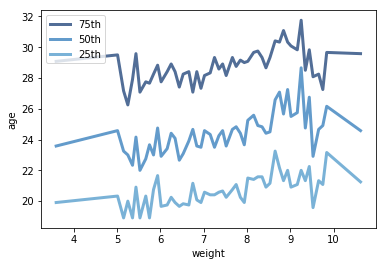

In [135]:
bins = np.arange(5, 10, 0.1)
indices = np.digitize(wgt, bins)
groups = live.groupby(indices)
mean_wgt = [group.totalwgt_lb.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
for percent in [75, 50, 25]:
    mean_age = [cdf.Percentile(percent) for cdf in cdfs]
    label='%dth' % percent
    thinkplot.Plot(mean_wgt, mean_age, label=label)
thinkplot.Config(xlabel='weight', ylabel='age', loc='upper left')

In [134]:
pearson, spearman = corr(wgt, age), SpearmanCorr(wgt, age)
pearson, spearman

(0.06883397035410908, 0.09461004109658228)

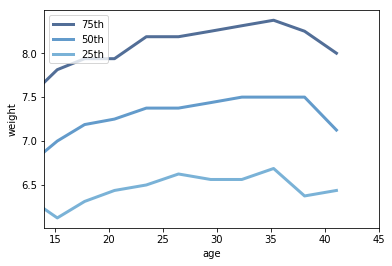

In [141]:
bins = np.arange(10, 42, 3)
indices = np.digitize(age, bins)
groups = live.groupby(indices)
mean_age = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
for percent in [75, 50, 25]:
    mean_wgt = [cdf.Percentile(percent) for cdf in cdfs]
    label='%dth' % percent
    thinkplot.Plot(mean_age, mean_wgt, label=label)
thinkplot.Config(xlabel='age', ylabel='weight', xlim=[14, 45], loc='upper left')